<a href="https://colab.research.google.com/github/AmirRezaBehzad/Image-Encryption/blob/main/Image_Encryption_Decryption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original image's shape is (2160, 3840, 3)
Grayscale image's shape is (2160, 3840)


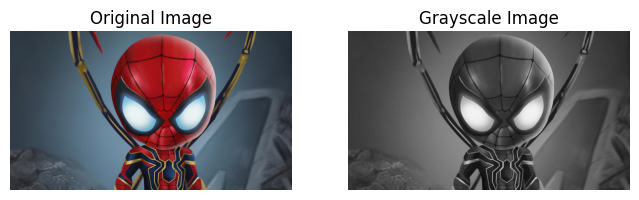

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

image_path = '/content/SpiderMan.jpg'
original_image = cv2.imread(image_path)

# Convert the original image to grayscale
grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Display the original and grayscale images side by side
plt.figure(figsize=(8, 4))

# Subplot for the original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Subplot for the grayscale image
plt.subplot(1, 2, 2)
plt.imshow(grayscale_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis('off')

print(f"Original image's shape is {original_image.shape}")
print(f"Grayscale image's shape is {grayscale_image.shape}")

plt.show()

In [33]:
import re

M = grayscale_image.shape[0]
N = grayscale_image.shape[1]

# Getting the key as an input
# InputKey = input("Enter integers in the format (M1, M2, M3, ..., Mn): ")
InputKey = "(5, 8, 1)"

# Extract integers using regular expression
KeyValues = re.findall(r'\d+', InputKey)

n = len(KeyValues)

# Convert extracted strings to integers
for i in range(len(KeyValues)):
  KeyValues[i] = int(KeyValues[i])

encrypted_image = grayscale_image.copy()


#Generating s-box
sbox = np.arange(256)
np.random.shuffle(sbox)

for i in range(n):
  fixBit = KeyValues[i]
  print(encrypted_image)
  print()
  shifted_encrypted_image = (encrypted_image >> fixBit) & 1
  print(shifted_encrypted_image)
  print()

  D = np.array(shifted_encrypted_image).reshape(-1)
  print(D)
  print()

  S0 = np.where(D == 0)[0]
  S1 = np.where(D == 1)[0]

  shuffle = np.concatenate((S0, S1))

  #  Reshape encrypted_image before indexing to avoid out-of-bounds error
  # ???
  encrypted_image = encrypted_image.reshape(-1)
  encrypted_image = encrypted_image[shuffle]

  print("Indices of 0s in D:", S0)
  print("Indices of 1s in D:", S1)

  encrypted_image = sbox[encrypted_image]

[[50 62 55 ... 49 33 29]
 [50 60 62 ... 34 37 36]
 [59 56 60 ... 40 44 48]
 ...
 [57 62 65 ... 87 84 81]
 [56 60 56 ... 90 80 74]
 [47 54 63 ... 86 79 83]]

[[1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]

[1 1 1 ... 0 0 0]

Indices of 0s in D: [      5      23      58 ... 8294397 8294398 8294399]
Indices of 1s in D: [      0       1       2 ... 8294368 8294382 8294387]
[109  73  24 ...  34  34 196]

[0 0 0 ... 0 0 0]

[0 0 0 ... 0 0 0]

Indices of 0s in D: [      0       1       2 ... 8294397 8294398 8294399]
Indices of 1s in D: []
[156 142 210 ...  32  32 173]

[0 1 1 ... 0 0 0]

[0 1 1 ... 0 0 0]

Indices of 0s in D: [      0       5       9 ... 8294397 8294398 8294399]
Indices of 1s in D: [      1       2       3 ... 8294389 8294390 8294392]


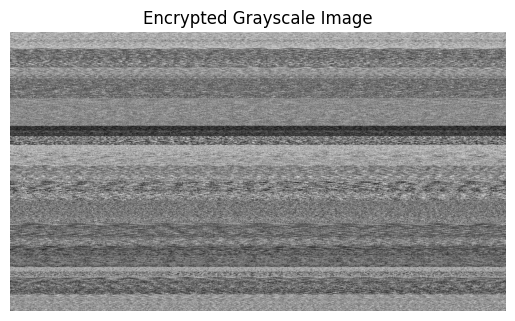

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming encrypted_image is defined and contains the encrypted grayscale image

# Reshape encrypted_image to the original dimensions of the grayscale image
encrypted_image = np.reshape(encrypted_image, grayscale_image.shape)

# Display the encrypted image
plt.imshow(encrypted_image, cmap="gray")
plt.title("Encrypted Grayscale Image")
plt.axis('off')
plt.show()


In [7]:
a = [[1,2,3,4],
     [32,45,12,5],
     [65,32,67,10],
     [67,54,23,19]]

print(a)
vector = np.array(a).reshape(-1)
print(vector)

[[1, 2, 3, 4], [32, 45, 12, 5], [65, 32, 67, 10], [67, 54, 23, 19]]
[ 1  2  3  4 32 45 12  5 65 32 67 10 67 54 23 19]


In [20]:
sbox = np.arange(256)
np.random.shuffle(sbox)
print(sbox)

[  3  33 196  13  47  32  55 192 211 154  56 203  65  67   7  73 157 219
  76 100 235   9  92 248 236 198 228  91 231 136  34  58  42  46 145   1
  54 183  86  61  63 132 212 225  14 244 167 123 222 129 184  82  97 134
  12 105 255 180 204  10 148 202 102  19 159 166 138 220 182  16 150  49
  85 117  78 224 147 181 128 205 149 187  90  60 207  99 229 153 143 104
  93 103  20 201  94 152  22 131   5 206   4 185  74  87 126 142 109   8
  66 214 158 106 116  70 247  26  50 135 233  77 171 234  48  59 199  18
 223  96 190 141 130 110 249 124 226 218 114 175  52  71 113 127 239 178
 250 200  39 238 172 174  80 173 137 161 112  36 162 242  38  64 253  68
  84 155 221 189 164 144 186 246 140  15  28  23  44  57  51  25 120 195
 194 168  69 197 179  75 191 241 151 213  83 163 245 237 170 125   2 160
 188 146 121  98 209  45 215 232  35 139 193  31 176 115 111 252   0  17
  21  41  43  88  79 217 118 216 107 227  11  81 156  37  27 122 165  53
 177  89  40 254 169 210 230 243  62 240 101 208  3